#Wine dataset 분류

In [1]:
import torch
from torch import nn, optim
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd

In [2]:
#연산 방법 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
torch.manual_seed(1234)
if device == 'cuda':
    torch.cuda.manual_seed_all(1234)

In [3]:
#데이터 불러오기
wine = load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [4]:
pd.DataFrame(wine.data, columns = wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [14]:
#input, output 데이터 설정
input = wine.data
output = wine.target

#train, test data split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.33, random_state=42, stratify=wine.target, shuffle = True)

#데이터를 텐서로 바꾸고 gpu 연산이 가능하도록 gpu에 옮김
X_train = torch.FloatTensor(X_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

#텐서 타입 지정
**torch 데이터 선언시, 사용할 수 있는 데이터 타입**  
 32-bit floating Point : FloatTensor

  64-bit floating Point : DoubleTensor

  16-bit floating Point : HalfTensor

  8-bit integer : ByteTensor(unsigned), CharTensor(signed)

  16-bit integer : ShortTensor

  32-bit integer : IntTensor

  64-bit integer : LongTensor  
보통 계산을 하기 위한 데이터들에는 FloatTensor를 사용하고 Int형 숫자를 사용할 때는 LongTensor를 사용하며 True/False 사용시 ByteTensor를 사용한다  
[출처] https://dk-kang.tistory.com/entry/PyTorch-%EC%8B%A4%EC%8A%B5-Tensor-%EC%A1%B0%EC%9E%91%ED%95%98%EA%B8%B01

In [7]:
print(len(X_train))
print(len(X_test))

119
59


In [8]:
print(X_train[0])
print(y_train[0])

tensor([1.3750e+01, 1.7300e+00, 2.4100e+00, 1.6000e+01, 8.9000e+01, 2.6000e+00,
        2.7600e+00, 2.9000e-01, 1.8100e+00, 5.6000e+00, 1.1500e+00, 2.9000e+00,
        1.3200e+03], device='cuda:0')
tensor(0, device='cuda:0')


**input 변수가 13개!  
  y의 class 종류가 3개!**

In [9]:
#Modeling
model = nn.Sequential(
    nn.Linear(13, 50, bias=True), #input_layer(feature의 개수) = 13, hidden_layer1 = 50
    nn.Sigmoid(),
    nn.Linear(50, 75, bias=True), #hidden_layer1 = 50, hidden_layer2 = 75 
    nn.Sigmoid(),
    nn.Linear(75, 100, bias=True), #hidden_layer2 = 75, hidden_layer3 = 100
    nn.Sigmoid(),
    nn.Linear(100, 75, bias=True), #hidden_layer3 = 100, hidden_layer4 = 75
    nn.Sigmoid(),
    nn.Linear(75, 50, bias=True), #hidden_layer4 = 75, hidden_layer5 = 50
    nn.Sigmoid(),
    nn.Linear(50, 3, bias=True), #hidden_layer5 = 50, output_layer = 3(label의 개수)
    nn.Softmax()
    ).to(device)

**활성화 함수 Activation Function 으로는 sigmoid function  
출력층 함수로는 Softmax function**  
 - 소프트맥스 함수는 input 값을 [0,1] 사이의 값으로 모두 정규화하여 출력하며, 출력값들의 총합은 항상 1이 되는 특성을 가진 함수이다  
 - 다중 분류 multi-class classification 문제에서 사용  
 - 분류될 클래스가 n개라고 할 때, n차원의 벡터를 입력받아 각 클래스에 속할 확률을 추정한다
 - 확률값을 반환한다는 점에서 시그모이드와 비슷하지만 시그모이드 함수를 통과해 얻은 확률값들은 서로 독립적이다. multi-class classification에서 시그모이드 함수는 사용할 수 없고 대신 소프트 맥스 함수를 사용한다  
 [출처]https://heeya-stupidbutstudying.tistory.com/38

In [10]:
#loss function 생성
loss_fn = nn.CrossEntropyLoss().to(device)

#앞서 생성한 model의 parameter update 해주는 optimizer; learning rate = 0.5
optimizer = optim.SGD(model.parameters(), lr=0.5)

In [11]:
losses = []

for epoch in range(100):

    #매 epoch마다 gradient 초기화
    optimizer.zero_grad()

    #forward 연산
    hypothesis = model(X_train)

    #loss 계산
    cost = loss_fn(hypothesis, y_train)
    #역전파
    cost.backward()
    #parameter 업데이트
    optimizer.step()
    #값만 가져오기 위해서 .item()
    losses.append(cost.item())

    #100의 배수에 해당되는 에포크마다 비용을 출력
    if epoch %10 == 0:
        print(epoch, cost.item())

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


0 1.0879794359207153
10 1.0851212739944458
20 1.08502995967865
30 1.085010051727295
40 1.0850051641464233
50 1.0850038528442383
60 1.0850032567977905
70 1.08500337600708
80 1.085003137588501
90 1.0850032567977905


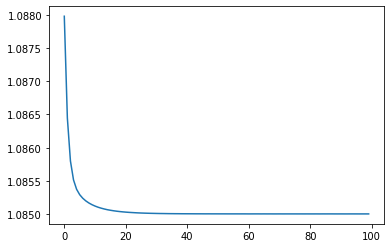

In [12]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

#gradient를 사용하지 않음
with torch.no_grad():

    model = model.to('cpu')
    y_pred = model(X_test)

    #tensor를 numpy로 바꿈
    y_pred = y_pred.detach().numpy()
    predicted = np.argmax(y_pred, axis = 1)
    
    print(f'model의 output은 :  {y_pred[0]}' )
    print(f'argmax를 한 후의 output은 {predicted[0]}')

    #accuracy 확인
    accuracy = (accuracy_score(predicted,y_test))
    print(f'accuracy는 {accuracy}')

model의 output은 :  [0.33003142 0.53768307 0.13228543]
argmax를 한 후의 output은 1
accuracy는 0.3898305084745763


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
